# Kaggle Competition: Predicting Red Hat Business Value
## Define the problem: Classify customer potential
Like most companies, Red Hat is able to gather a great deal of information over time about the behavior of individuals who interact with them. They’re in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.

**What is the problem? (include similar problems and assumptions)** <br>
In this competition, Kagglers are challenged to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.

**Why does the problem need to be solved?** <br>
With an improved prediction model in place, Red Hat will be able to more efficiently prioritize resources to generate more business and better serve their customers.

The challenge of this competition is to predict the potential business value of a person who has performed a specific activity. The business value outcome is defined by a yes/no field attached to each unique activity in the activity file. The outcome field indicates whether or not each person has completed the outcome within a fixed window of time after each unique activity was performed.

**How could the problem be solved (manually brainstorm potential approaches)** <br>
TBC

## Data 
**Explain the data available (What is/is'nt needed)** <br>
This competition uses two separate data files that may be joined together to create a single, unified data table: a people file and an activity file.

The people file contains all of the unique people (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique people_id.

The activity file contains all of the unique activities (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents a unique activity performed by a person on a certain date. Each activity has a unique activity_id.

The activity file contains several different categories of activities. Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).

To develop a predictive model with this data, you will likely need to join the files together into a single data set. The two files can be joined together using person_id as the common key. All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

## Evaluation Criteria
For each activity_id in the test set, you must predict a probability for the 'outcome' variable, represented by a number between 0 and 1
Evaluated on area under the ROC curve between the predicted and the observed outcome

### Reference
https://www.kaggle.com/c/predicting-red-hat-business-value/data <br>
https://machinelearningmastery.com/machine-learning-checklist/ <br>
https://machinelearningmastery.com/process-for-working-through-machine-learning-problems/ <br> 
https://medium.com/swlh/framework-for-creating-value-with-ai-6c6d5bb5ff42

In [1]:
#Process: imports, read data, data preparation, data transforms, model selection, model tuning, ensemlbing and so on is a combinatorial problem

**Import Libraries**

In [2]:
#!pip install ipython-autotime

In [3]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#%load_ext autotime

In [4]:
from data_cleaning_helper_functions import *


Bad key text.latex.unicode in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotli

**Read Data**

In [5]:
train_data = pd.read_csv('/Users/Rej1992/Documents/kaggle/Data/predicting-red-hat-business-value/act_train.csv')
test_data = pd.read_csv('/Users/Rej1992/Documents/kaggle/Data/predicting-red-hat-business-value/act_test.csv')
people = pd.read_csv('/Users/Rej1992/Documents/kaggle/Data/predicting-red-hat-business-value/people.csv')

In [6]:
train_data['flag'] = 'train_data'
test_data['flag'] = 'test_data'

**Data Preprocessing (Data Preparation)** <br>
Describe in detail each attribute and relationships between attributes. This grunt work forces thought about the data in the context of the problem before it is lost to the algorithms
- Format data so that it is in a form that you can work with.
- Clean the data so that it is uniform and consistent.
- Representatively sample the data rows and select attributes that best expose the structures in the data to the models in order to best trade-off redundancy and problem fidelity 

In [7]:
uncommon_elements(test_data.columns, train_data.columns)

['outcome']

In [8]:
all_data = pd.concat([train_data, test_data], axis=0)

In [9]:
assert (len(train_data) + len(test_data)) == len(all_data)

In [10]:
duplicated_indicies(all_data)

Int64Index([], dtype='int64')

In [11]:
identify_missing_values(all_data)

Nan values = 23180833

Variable char_1 has 2498271 records (92.67%) with missing values.
Variable char_2 has 2498271 records (92.67%) with missing values.
Variable char_3 has 2498271 records (92.67%) with missing values.
Variable char_4 has 2498271 records (92.67%) with missing values.
Variable char_5 has 2498271 records (92.67%) with missing values.
Variable char_6 has 2498271 records (92.67%) with missing values.
Variable char_7 has 2498271 records (92.67%) with missing values.
Variable char_8 has 2498271 records (92.67%) with missing values.
Variable char_9 has 2498271 records (92.67%) with missing values.
Variable char_10 has 197707 records (7.33%) with missing values.
Variable outcome has 498687 records (18.50%) with missing values.
In total, there are 11 variables with missing values


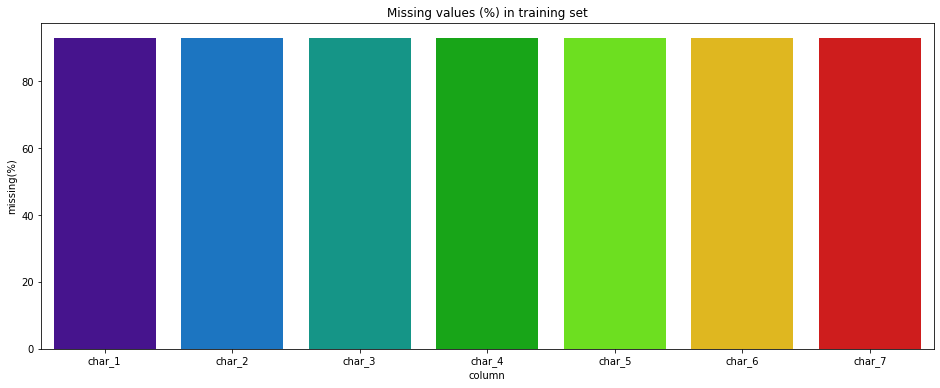

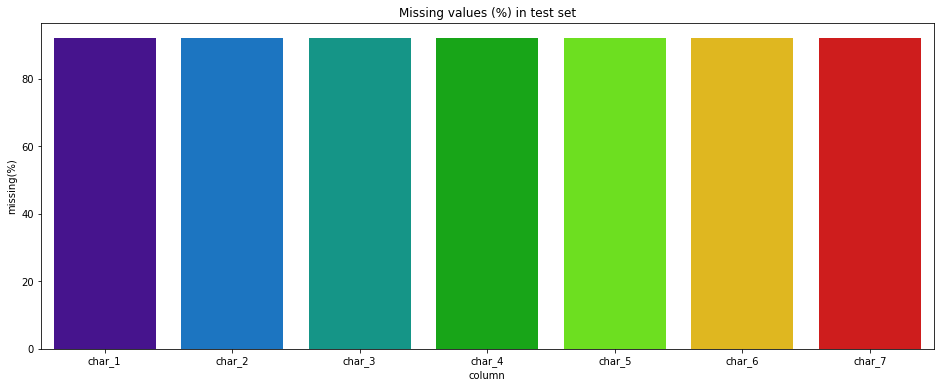

In [12]:
plot_missing_data(train_data, test_data)

In [14]:
cols = ['activity_category', 'char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10']

all_data = impute_nan_corrupt_missing_values_categorical(all_data, cols)

In [15]:
identify_missing_values(all_data)

Nan values = 498687

Variable outcome has 498687 records (18.50%) with missing values.
In total, there are 1 variables with missing values


In [16]:
all_data['date'] = correct_dates(all_data, 'date')

In [17]:
for category in cols:
    all_data[category] = correct_category_datatype(all_data, category)

In [18]:
multiple_column_comparison(all_data, cols)
print("""""")
determine_variable_cardinality(all_data, cols)

       activity_category        char_1        char_2        char_3  \
count            2695978       2695978       2695978       2695978   
unique                 7            52            33            12   
top               type 2  unclassified  unclassified  unclassified   
freq             1127847       2498271       2498271       2498271   

              char_4        char_5        char_6        char_7        char_8  \
count        2695978       2695978       2695978       2695978       2695978   
unique             8             8             6             9            19   
top     unclassified  unclassified  unclassified  unclassified  unclassified   
freq         2498271       2498271       2498271       2498271       2498271   

              char_9  char_10  
count        2695978  2695978  
unique            20     6970  
top     unclassified   type 1  
freq         2498271  1127847  

Variable activity_category has 7 distinct values
Variable char_1 has 52 distinct values

In [19]:
all_data = remove_columns_unique_values(all_data) 
#all_data = zero_variance_predictors(all_data) # produces the same result as zero_variance_predictors: Slower approach

In [20]:
determine_class_imbalance(train_data, 'outcome')

0    1221794
1     975497
Name: outcome, dtype: int64

**Data Transforms**
- [x] Create linear and non-linear transformations of all attributes
- [x] Decompose complex attributes into their constituent parts.
- [x] Aggregate denormalized attributes into higher-order quantities.
- [x] Common transforms (Square, Cube, Square root, Standardize (e.g. 0 mean and unit variance), Normalize (e.g. rescale to 0-1), Descritize (e.g. convert a real to categorical)

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695978 entries, 0 to 498686
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   people_id          object        
 1   activity_id        object        
 2   date               datetime64[ns]
 3   activity_category  category      
 4   char_1             category      
 5   char_2             category      
 6   char_3             category      
 7   char_4             category      
 8   char_5             category      
 9   char_6             category      
 10  char_7             category      
 11  char_8             category      
 12  char_9             category      
 13  char_10            category      
 14  outcome            float64       
 15  flag               object        
dtypes: category(11), datetime64[ns](1), float64(1), object(3)
memory usage: 154.6+ MB


Exploratory Data Analysis
Develop a set of hypothesis's to test that should hold in the real world - Validate does the data make sense?
- Create univariate plots of each attribute.
- Create bivariate plots of each attribute with every other attribute.
- Create bivariate plots of each attribute with the class variable

Model Development and Selection
- Create Test Harness
    - This section is intended to help you define a robust method for model evaluation that can reliably be used to compare results.
    - Create a hold-out validation dataset for use later.
    = Select a cross-validation strategy (which datasets perform the best? Why?)
    - Evaluate and select an appropriate test option.
    - Select one (or a small set) performance measure used to evaluate models.
- Evalute Multiple (suitable) Model Candidates and select the most promising candidates
    - Use statistical significance tests to flush out meaningful results from noise

Model Improvements
- Model tuning
- Ensemlbing Methods
- Model Selection
    - Select a diverse subset (5-10) of well performing models or model configurations.
    - Evaluate well performing models on a hold out validation dataset (running an automated sensitivity analysis on the parameters of the top performing algorithms)
    - Select a small pool (1-3) of well performing models.
    - Include statistical tests to validate and support arguments in relation to model improvement 

Finalise the Project
- Decision Record
- Present Results
    - This section is intended to ensure you capture what you did and learned so that others (and your future self) can make best use of it
    - Write up project in a short report (1-5 pages).
    - Convert write-up to a slide deck to share findings with others.
    - Share code and results with interested parties.

- Operationalize Results
    - This section is intended to ensure that you deliver on the solution promise made up front.
    - Adapt the discovered procedure from raw data to result to an operational setting.
    - Deliver and make use of the predictions.
    - Deliver and make use of the predictive model.